In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_data = pd.read_csv('sales所在周次节假日_剔除换货.csv')
all_data.rename(columns={'店铺名称':'store','地理位置指数':'position','年份':'years','周次':'weeks of year','是否包含法定节假日':'Isholiday','季节':'season','大类':'item','销量(剔除换货）':'sales','均价（剔除换货）':'prices','促销（剔除换货）':'discount'},inplace=True)
all_data['weeks'] = all_data['weeks of year']

a = all_data
week_5 = a.loc[lambda a : a['years'] == 2015]
week_6 = a.loc[lambda a : a['years'] == 2016]
week_6['weeks'] += 53
a = pd.concat([week_5,week_6])

from sklearn import preprocessing

#map店铺名称
name = a['store']
le = preprocessing.LabelEncoder()
le.fit(name)
list(name)
le.transform(name)
tmp = le.transform(name)
a['store'] = tmp

#map合并大类
category = a['item']
le.fit(category)
list(category)
le.transform(category)
tmp = le.transform(category)
a['item'] = tmp

#map季节
season = a['season']
le.fit(season)
list(season)
le.transform(season)
tmp = le.transform(season)
a['season'] = tmp

df = a
masked_series = (df['years']==2016) & (df['weeks'].isin([53,54,55]))
masked_series2 = (df['years']==2016) & (~(df['weeks'].isin([53,54,55])))
df.loc[(masked_series), 'train_or_test'] = 'test'
df.loc[(masked_series2), 'train_or_test'] = 'no_train'
print('Train shape: {}'.format(df.loc[df['years']==2015,:].shape))
print('Test shape: {}'.format(df.loc[df.train_or_test=='test',:].shape))

df_n = df.drop(['train_or_test'],axis=1)
df_n['sales'] = np.log1p(df.sales.values)
df_n['prices'] = np.log1p(df.sales.values)

Train shape: (8119, 12)
Test shape: (340, 12)


/home/lin/anaconda3/envs/boost/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


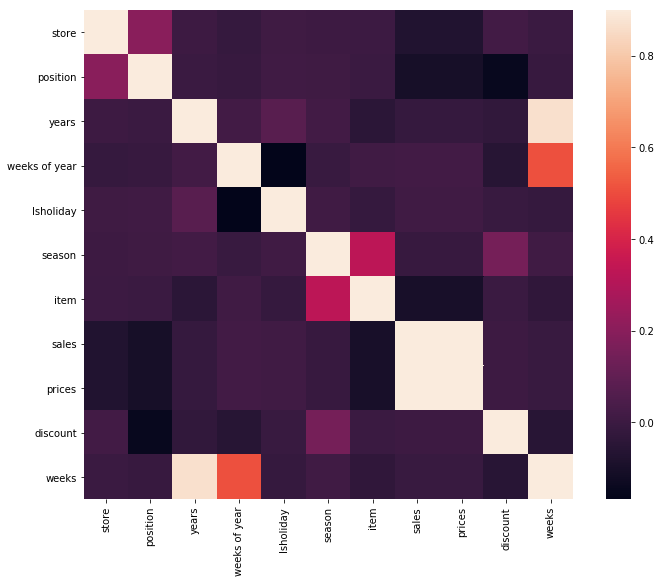

In [4]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_n.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
import matplotlib.pyplot as plt

df_item = pd.DataFrame(df_n.groupby(['weeks','item']).sum()['sales']).unstack()
df_item.plot(figsize=(16,9),title = 'Weekly Item Sales')
plt.show()

In [ ]:
df_store = pd.DataFrame(a.groupby(['weeks','store']).sum()['sales']).unstack()
df_store.plot(figsize=(16,9),title='Weekly Store Sales')
#stores.sort_index(inplace = True)
#stores.plot(figsize=(16,9), title='Weekly Store Sales', legend=None)
plt.show()